# Import des libraries


In [1]:
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(keys, value) for (value, keys) in word_index.items()]
)
decoded_newswire = " ".join(
    reverse_word_index.get(i - 3, "?") for i in train_data[0]
)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(train_labels[0])

3


# vectorization

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))  # Tuple ici
    for i, sequence in enumerate(sequences):
        for j in sequence:
            if j < dimension:  # Petit garde-fou si un index dépasse dimension
                result[i, j] = 1.
    return result


In [8]:
import numpy as np

#  Encoding the input data

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Encoding the labels

In [10]:
def to_one_hot(labels, dimension=46):
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.
    return result
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
# you can built-in encoding the labels withs Keras

#from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(train_labels)
#y_test = to_categorical(test_labels)


#  Building your model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

# Model definition

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# Compiling the model

In [15]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Setting aside a validation set

In [16]:
x_val = x_train[:1000]
x_partial_train = x_train[1000:]
y_val = y_train[:1000]
y_partial_train = y_train[1000:]

# Training the model

In [20]:
history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs =  20,
                    batch_size =512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9421 - loss: 0.2749 - val_accuracy: 0.8220 - val_loss: 0.8675
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9515 - loss: 0.2381 - val_accuracy: 0.8230 - val_loss: 0.8754
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9526 - loss: 0.2142 - val_accuracy: 0.8200 - val_loss: 0.9004
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9528 - loss: 0.1979 - val_accuracy: 0.8190 - val_loss: 0.8916
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9571 - loss: 0.1676 - val_accuracy: 0.8280 - val_loss: 0.8993
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9547 - loss: 0.1644 - val_accuracy: 0.8090 - val_loss: 0.9611
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9606 - loss: 0.1531 - val_accuracy: 0.8160 - val_loss: 0.9296
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9611 - loss: 0.1422 - val_accuracy: 0.8220 - v

#  Plotting the training and validation loss

In [23]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

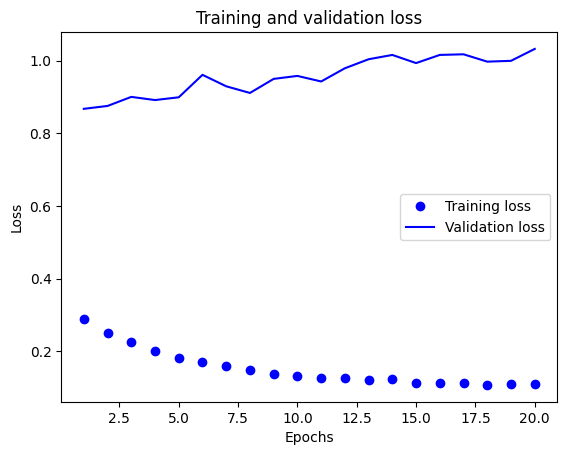

In [24]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

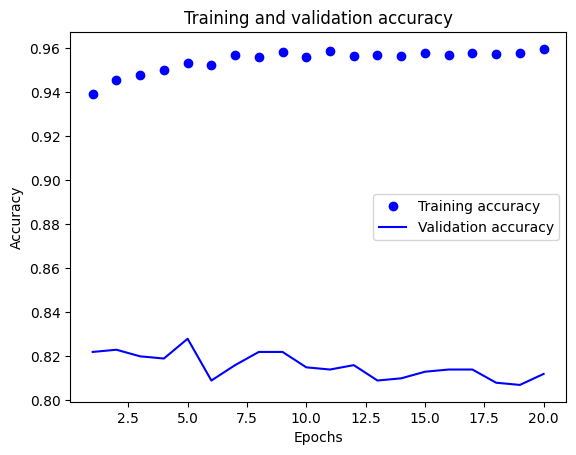

In [25]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model evaluation

In [26]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 1.0931


In [27]:
prediction = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [28]:
print(prediction[0].shape)


(46,)


In [30]:
print(prediction[3])

[1.6672229e-05 5.7866725e-07 2.4940275e-05 2.3187853e-04 3.4610678e-02
 1.3909413e-06 3.4830919e-07 1.7160501e-05 8.1759003e-07 8.1620058e-08
 1.4653607e-05 3.8105306e-06 7.8660465e-09 6.6649693e-04 6.6451162e-07
 9.1682745e-07 9.6082801e-01 3.0952832e-03 3.1219139e-07 1.7639705e-07
 3.8026439e-05 6.7271890e-06 6.6940192e-06 2.9137800e-04 3.0130687e-07
 3.4877987e-05 6.6731161e-07 2.8270766e-05 4.5495196e-07 6.0434145e-06
 3.6062997e-06 1.4549627e-07 5.4197331e-09 7.4075056e-06 3.3098473e-08
 3.2771927e-09 5.6121694e-06 2.8485254e-06 7.0631256e-09 1.4510172e-06
 1.1227790e-07 4.3832828e-05 4.6289333e-08 8.9133010e-08 4.8367906e-07
 5.9115823e-06]


In [31]:
print(np.sum(prediction[0]))

1.0000001


In [35]:
print(np.sum(prediction[0].shape))

46
